In [1]:
import seaborn as sns

sns.set(font_scale=1) # seaborn 기초 세팅

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

In [3]:
import warnings
warnings.simplefilter("ignore")

### 데이터 로드
- 파일내 특정 시트 호출하기

In [21]:
# sheet_name = 3
df = pd.read_excel('../../data/dataset/2022년 06월  교통카드 통계자료.xls', sheet_name=3, thousands=',', usecols='B, D:AV', skiprows=1)
df.head(3)

,Unnamed: 1,Unnamed: 3,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,하차.3,...,승차.17,하차.17,승차.18,하차.18,승차.19,하차.19,승차.20,하차.20,승차.21,하차.21
0,1호선,서울역,646,24,8433,7694,12608,46963,39233,100397,...,76345,35471,51224,26045,20385,15480,158,1332,1,4
1,1호선,시청,271,7,3133,4802,3321,23621,6647,62427,...,43072,5598,29032,4091,9254,2938,72,422,0,2
2,1호선,종각,91,9,4007,3960,3682,22533,5814,95376,...,80861,7772,65832,5368,27781,3590,315,394,0,1


### 컬럼명 변경
- Unnamed: 1 > 호선명
- Unnamed: 3 > 지하철역
- 승차 > 승차_시간 ( 4 ~ 26 )
- 하차 > 하차_시간 ( 4 ~ 26 )

In [22]:
df.rename(columns={'Unnamed: 1':'호선명', 'Unnamed: 3':'지하철역'}, inplace=True)

In [23]:
df.rename(columns={'승차':'승차_4','하차':'하차_4'}, inplace=True)
for h in range(4, 27):
    df.rename(columns={'승차.' + str(h - 4):'승차_' + str(h), '하차.' + str(h - 4):'하차_' + str(h)}, inplace=True)

In [24]:
df.columns

Index(['호선명', '지하철역', '승차_4', '하차_4', '승차_5', '하차_5', '승차_6', '하차_6', '승차_7',
       '하차_7', '승차_8', '하차_8', '승차_9', '하차_9', '승차_10', '하차_10', '승차_11',
       '하차_11', '승차_12', '하차_12', '승차_13', '하차_13', '승차_14', '하차_14', '승차_15',
       '하차_15', '승차_16', '하차_16', '승차_17', '하차_17', '승차_18', '하차_18', '승차_19',
       '하차_19', '승차_20', '하차_20', '승차_21', '하차_21', '승차_22', '하차_22', '승차_23',
       '하차_23', '승차_24', '하차_24', '승차_25', '하차_25'],
      dtype='object')

### 출근 시간대 사람들이 가장 많이 타는 역
- 승차_7 ~ 승차_9 = 출승 계
- 하차_7 ~ 하차_9 = 출하 계

In [27]:
df['출승 계'] = df['승차_7'] + df['승차_8'] + df['승차_9']
df['하승 계'] = df['하차_7'] + df['하차_8'] + df['하차_9']

In [28]:
df.head()

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,승차_25,하차_25,출승 계,하승 계
0,1호선,서울역,646,24,8433,7694,12608,46963,39233,100397,...,51224,26045,20385,15480,158,1332,1,4,159172,438678
1,1호선,시청,271,7,3133,4802,3321,23621,6647,62427,...,29032,4091,9254,2938,72,422,0,2,24152,322967
2,1호선,종각,91,9,4007,3960,3682,22533,5814,95376,...,65832,5368,27781,3590,315,394,0,1,27273,460814
3,1호선,종로3가,190,12,3882,3261,3570,14038,4746,25469,...,42291,5558,17170,4119,310,843,3,3,26514,159722
4,1호선,종로5가,34,0,1730,3909,2986,16406,5020,41304,...,22016,3862,6208,2628,98,668,0,0,25495,198062


In [29]:
df[df['출승 계'].max() == df['출승 계']]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,승차_25,하차_25,출승 계,하승 계
39,2호선,신림,253,10,38809,4518,73523,20593,188110,30954,...,40123,113573,20492,75909,3087,17134,6,188,638753,126731


In [30]:
df[df['하승 계'].max() == df['하승 계']]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,승차_25,하차_25,출승 계,하승 계
30,2호선,역삼,32,0,4342,6889,8419,38605,14518,138583,...,59777,14805,22742,9700,3222,2294,2,21,61350,775247


### 밤 11시에 사람들이 가장 많이 타는 역

In [32]:
df[df['승차_23'].max() == df['승차_23']]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,승차_25,하차_25,출승 계,하승 계
31,2호선,강남,231,8,11812,10667,19128,49306,37334,147542,...,176473,40499,81016,26765,12407,5773,2,35,148582,760050


### 사용자로부터 입력받은 시간대에 사람들이 가장많이 타는 역

In [40]:
hour = int(input('시간은 24시간 제로 입력해주세요\n'))

시간은 24시간 제로 입력해주세요
23


In [41]:
df[df['승차_' + str(hour)].max() == df['승차_' + str(hour)]]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,승차_25,하차_25,출승 계,하승 계
31,2호선,강남,231,8,11812,10667,19128,49306,37334,147542,...,176473,40499,81016,26765,12407,5773,2,35,148582,760050


### 시간대별로승객이 가장 많이 타고 내리는 역

#### 1) 4 ~ 24시 컬럼 추출

In [47]:
groups_col = df.columns[2:-4]

#### 2) 각 시간대별 최대인원 추출

In [52]:
passenger_max = df[groups_col].max().to_list()
passenger_max[:10]

[11784, 63, 38809, 10667, 73523, 49306, 188110, 147542, 281017, 368521]

#### 3) 각 시간대별 최대인원의 인덱스 번호 추출 

In [55]:
df.iloc[df['승차_4'].idxmax()]

호선명         경부선
지하철역         구로
승차_4      11784
하차_4         48
승차_5      23203
하차_5       5081
승차_6      19267
하차_6      13841
승차_7      38272
하차_7      31965
승차_8      37929
하차_8      73254
승차_9      26737
하차_9      40757
승차_10     20254
하차_10     26969
승차_11     20873
하차_11     21866
승차_12     22161
하차_12     21555
승차_13     22752
하차_13     22516
승차_14     22596
하차_14     21875
승차_15     26153
하차_15     24318
승차_16     31996
하차_16     28921
승차_17     48970
하차_17     38033
승차_18     62727
하차_18     43613
승차_19     25136
하차_19     30633
승차_20     20011
하차_20     20136
승차_21     18195
하차_21     19329
승차_22     12707
하차_22     18049
승차_23      4756
하차_23     18667
승차_24        21
하차_24     11844
승차_25         2
하차_25         8
출승 계     102938
하승 계     145976
Name: 128, dtype: object

In [57]:
idxmax_list = df[groups_col].idxmax().to_list()
idxmax_list[:10]

[128, 125, 39, 31, 39, 31, 39, 31, 39, 512]

#### 4) passenger_max 와 idxmax_list 연결하여 새로운 데이터프레임(time_df) 생성

In [61]:
data = {
    'idx_max':idxmax_list,
    '승하차':groups_col,
    '승객수':passenger_max
}
time_df = pd.DataFrame(data)

In [67]:
time_df.head()

,idx_max,승하차,승객수
0,128,승차_4,11784
1,125,하차_4,63
2,39,승차_5,38809
3,31,하차_5,10667
4,39,승차_6,73523


#### 5) idx_max 값을 이용해서 지하철역 이름 찾기

In [70]:
df.iloc[time_df['idx_max'], 1]

128          구로
125         영등포
39           신림
31           강남
39           신림
31           강남
39           신림
31           강남
39           신림
512     가산디지털단지
39           신림
31           강남
39           신림
31           강남
39           신림
25     잠실(송파구청)
25     잠실(송파구청)
48         홍대입구
31           강남
48         홍대입구
31           강남
48         홍대입구
31           강남
48         홍대입구
31           강남
48         홍대입구
31           강남
48         홍대입구
31           강남
39           신림
31           강남
39           신림
31           강남
39           신림
31           강남
39           신림
31           강남
39           신림
31           강남
39           신림
31           강남
43          신도림
Name: 지하철역, dtype: object

#### 6) time_df 에 지하철역 컬럼 생성한 후 5) 내용 추가 

In [72]:
time_df['지하철역'] = df.iloc[time_df['idx_max'], 1].to_list()
time_df.head(3)

,idx_max,승하차,승객수,지하철역
0,128,승차_4,11784,구로
1,125,하차_4,63,영등포
2,39,승차_5,38809,신림


#### 7) 승하차 컬럼에서 시간 잘라낸 후 hour 컬럼에 담기

In [78]:
time_df['hour'] = time_df['승하차'].str.split("_", expand=True)[1]

In [81]:
time_df.head()

,idx_max,승하차,승객수,지하철역,hour
0,128,승차_4,11784,구로,4
1,125,하차_4,63,영등포,4
2,39,승차_5,38809,신림,5
3,31,하차_5,10667,강남,5
4,39,승차_6,73523,신림,6


In [84]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   idx_max  42 non-null     int64 
 1   승하차      42 non-null     object
 2   승객수      42 non-null     int64 
 3   지하철역     42 non-null     object
 4   hour     42 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.8+ KB


In [88]:
time_df['hour'] = time_df['hour'].astype('int64')
time_df.dtypes

idx_max     int64
승하차        object
승객수         int64
지하철역       object
hour        int64
dtype: object

#### 8) 혼잡역 컬럼 생성 : 지하철역_hour 생성

In [92]:
time_df['혼잡역'] = time_df['지하철역'] + '_' + time_df['hour'].astype(str)

In [94]:
time_df.head()

,idx_max,승하차,승객수,지하철역,hour,혼잡역
0,128,승차_4,11784,구로,4,구로_4
1,125,하차_4,63,영등포,4,영등포_4
2,39,승차_5,38809,신림,5,신림_5
3,31,하차_5,10667,강남,5,강남_5
4,39,승차_6,73523,신림,6,신림_6


#### 9) 시각화

Text(0.5, 1.0, '승차 시 혼잡역')

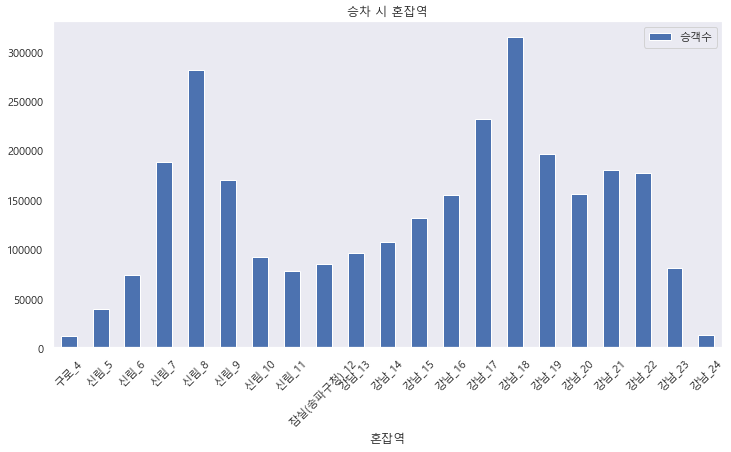

In [105]:
ax = time_df[time_df['승하차'].str.contains('승차')].plot.bar(x='혼잡역', y='승객수', grid=False,rot=45, figsize=(12,6));
ax.set_title('승차 시 혼잡역')

Text(0.5, 1.0, '하차 시 혼잡역')

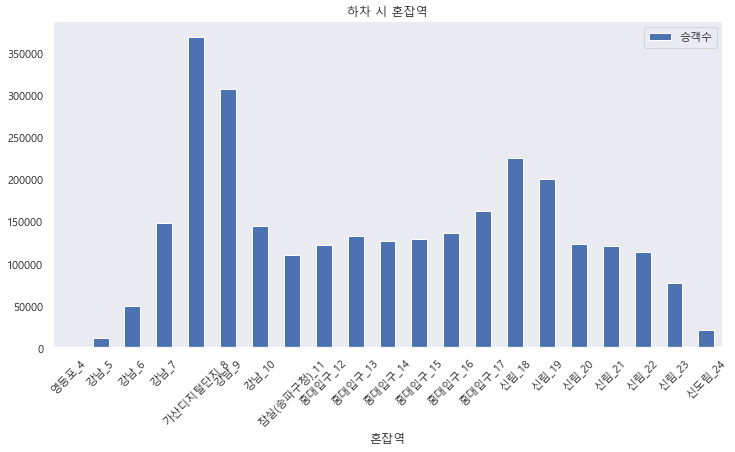

In [106]:
ax = time_df[time_df['승하차'].str.contains('하차')].plot.bar(x='혼잡역', y='승객수', grid=False,rot=45, figsize=(12,6));
ax.set_title('하차 시 혼잡역')

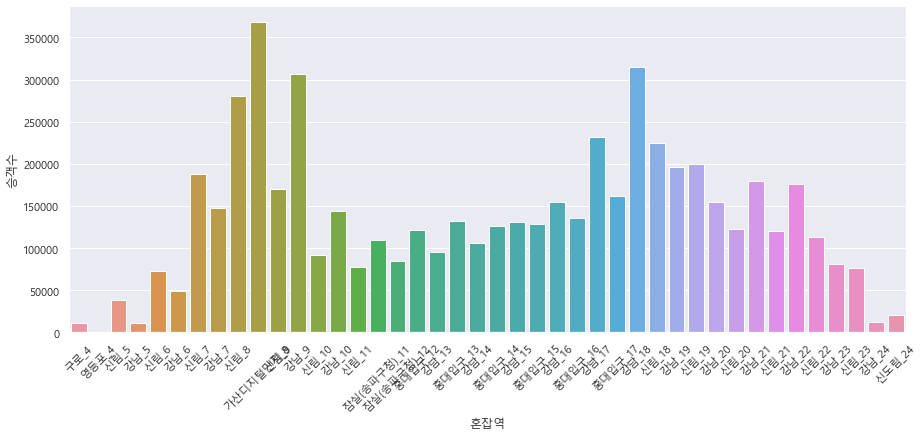

In [111]:
plt.figure(figsize=(15, 6))
sns.barplot(data=time_df, x='혼잡역', y='승객수')
plt.xticks(rotation=45)
plt.show()

In [ ]:
time_df_in.values_counts('지하철역').plot.pie(autopct='%.1f%%', figsize=(10, 10))

#### seaborn countplot

<AxesSubplot:xlabel='지하철역', ylabel='count'>

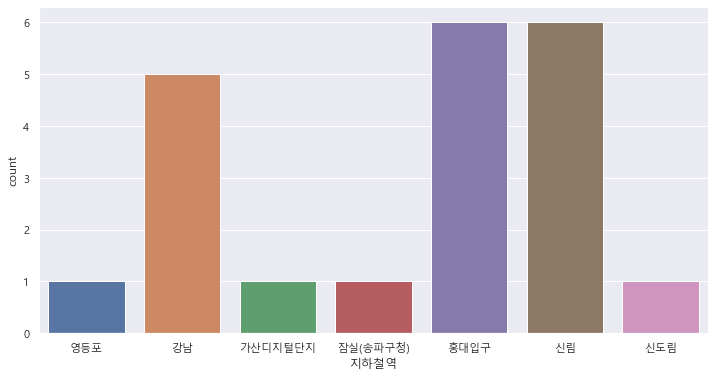

In [116]:
plt.figure(figsize=(12,6))
sns.countplot(data=time_df[time_df['승하차'].str.contains('하차')], x='지하철역')